In [36]:
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import scattertext as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing Tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import spacy

# Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Topic Modeling
from sklearn.decomposition import TruncatedSVD, NMF

# Topic Modeling
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

# Load Data

In [2]:
# Read in the pickle file
df = pd.read_pickle('df_sentiment_score_spacy_docs_cleaned_pkl')

In [28]:
# Set the display constraints to be able to read entire reviews
pd.set_option('display.max_colwidth', None)

df.sample(3)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score,spacy_doc,docs_clean
21944,209010954,4,2013-12,United Kingdom,"we have been to Disneyland twice (2005 and 2008). I love anything Disney but my hubby not so much, so been able to do Disneyland Park in one day is a bonus for him. Only been to California Adventure once though. We love Buzz Lightyears astroblasters (thinking that we are 45 ad 46) and usually go on 3 or 4 times. I also love the Indiana Jones rollercoaster, which you don't get in Florida. If you can manage it go in teh first week of December when they actually film the Christmas parade its fantastic.",California,Positive,0.9831,"(we, have, been, to, Disneyland, twice, (, 2005, and, 2008, ), ., I, love, anything, Disney, but, my, hubby, not, so, much, ,, so, been, able, to, do, Disneyland, Park, in, one, day, is, a, bonus, for, him, ., Only, been, to, California, Adventure, once, though, ., We, love, Buzz, Lightyears, astroblasters, (, thinking, that, we, are, 45, ad, 46, ), and, usually, go, on, 3, or, 4, times, ., I, also, love, the, Indiana, Jones, rollercoaster, ,, which, you, do, n't, get, in, Florida, ., If, you, can, manage, it, go, in, teh, first, week, of, December, when, they, ...)","[disneyland, twice, love, disney, hubby, able, disneyland, park, day, bonus, california, adventure, love, buzz, lightyears, astroblaster, think, ad, usually, time, love, indiana, jones, rollercoaster, florida, manage, teh, week, december, actually, film, christmas, parade, , fantastic]"
33388,407599987,5,2016-8,United Kingdom,"We visited on a Wed pm in August with teens after visiting Studios in the morning. The kids were not interested in characters, parades or shows so we just did some rides. Space Mountain had 5 min queue all pm, no queue for single riders. Buzz Lightyear was 60 mins all the time until about 8pm but we got fast pass for this ride. We got on teacups with no queue during parade but Dumbo ride took 30 minutes even though queue looked small! We used the Disney app & walked straight on to Pirates of Carribean ride when it showed no queue around 7pm. We found it really easy to get to Disneyland from CDG Airport using the TGV train. It only takes 10 minutes so you barely get time to find your seat before you're back off the train. We booked the tickets for 1.5 hours after our flight arrival time through the official scnf website about 3 months before our flight. It cost 15 euros each one way. For security & safety worriers, all bags are scanned before entering the Disney complex & we heard people being challenged about the contents of scanned bags. Everywhere felt normal & safe. We found one day (12 hours) enough time for Studios & Disneyland with teens who were just too old for the cuddly side of Disney.",Paris,Positive,0.7651,"(We, visited, on, a, We, d, pm, in, August, with, teens, after, visiting, Studios, in, the, morning, ., The, kids, were, not, interested, in, characters, ,, parades, or, shows, so, we, just, did, some, rides, ., Space, Mountain, had, 5, min, queue, all, pm, ,, no, queue, for, single, riders, ., Buzz, Lightyear, was, 60, mins, all, the, time, until, about, 8, pm, but, we, got, fast, pass, for, this, ride, ., We, got, on, teacups, with, no, queue, during, parade, but, Dumbo, ride, took, 30, minutes, even, though, queue, looked, small, !, We, used, the, Disney, app, &, walked, ...)","[visit, d, pm, august, teen, visit, studio, morning, kid, interested, character, parade, show, ride, space, mountain, min, queue, pm, queue, single, rider, buzz, lightyear, min, time, pm, get, fast, pass, ride, get, teacup, queue, parade, dumbo, ride, take, minute, queue, look, small, disney, app, walk, straight, pirate, carribean, ride, show, queue, pm, find, easy, disneyland, cdg, airport, tgv, train, take, minute, barely, time, find, seat, train, book, ticket, hour, flight, arrival, time, official, scnf, website, month, flight, cost, euro, way, security, safety, worrier, bag, scan, ent

# Divide Reviews into Subsets

In [3]:
# Disneyland - California
calif = df[df['Branch']=='California']
calif.shape

(17745, 10)

In [5]:
# Disneyland - Paris
paris = df[df['Branch']=='Paris']
paris.shape

(11547, 10)

In [29]:
# Disneyland - HongKong
hkong = df[df['Branch']=='HongKong']
hkong.shape

(8255, 10)

In [36]:
hkong.sample(2)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score,spacy_doc,docs_clean
1553,547367670,4,2017-12,Malaysia,"parks are well maintained. Staff are friendly. In comparison with Tokyo disneyland, this park is relatively small and have less games. if you plan properly, you can play most of the games within a day. The toys in the shops are expensive.",HongKong,Positive,0.7717,"(parks, are, well, maintained, ., Staff, are, friendly, ., , In, comparison, with, Tokyo, disneyland, ,, this, park, is, relatively, small, and, have, less, games, ., , if, you, plan, properly, ,, you, can, play, most, of, the, games, within, a, day, ., , The, toys, in, the, shops, are, expensive, .)","[park, maintain, staff, friendly, , comparison, tokyo, disneyland, park, relatively, small, game, , plan, properly, play, game, day, , toy, shop, expensive]"
3492,415568547,2,2016-9,Malaysia,"Part of it why I didnt enjoyed was because it was raining the day I went. And I found out they charged for the raincoat at HKD 65, and some of their rides are even closed.",HongKong,Negative,-0.5426,"(Part, of, it, why, I, did, nt, enjoyed, was, because, it, was, raining, the, day, I, went, ., And, I, found, out, they, charged, for, the, raincoat, at, HKD, 65, ,, and, some, of, their, rides, are, even, closed, .)","[not, enjoy, rain, day, go, find, charge, raincoat, hkd, ride, closed]"


# POS by Positive Rating

In [4]:
# Filter out the positive reviews
calif_pos_reviews = calif[calif['Rating_Type']=='Positive']

# Extract the adjectives in the positive reviews
calif_pos_adj = [token.text.lower() for doc in calif_pos_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the positive reviews
calif_top_pos_adj = Counter(calif_pos_adj).most_common(20)
calif_top_pos_adj

[('great', 6936),
 ('fast', 3550),
 ('good', 3361),
 ('long', 2723),
 ('best', 2514),
 ('old', 2407),
 ('worth', 2288),
 ('little', 2278),
 ('amazing', 2259),
 ('sure', 1758),
 ('magical', 1723),
 ('fun', 1645),
 ('busy', 1644),
 ('able', 1624),
 ('expensive', 1624),
 ('better', 1441),
 ('new', 1431),
 ('wonderful', 1417),
 ('crowded', 1321),
 ('clean', 1298)]

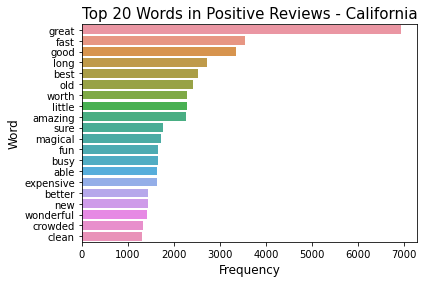

In [30]:
# Visualize top words
sns.barplot(x=list(dict(calif_top_pos_adj).values()), y=list(dict(calif_top_pos_adj).keys()), data=calif_pos_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Positive Reviews - California", fontsize=15)
plt.show()

In [12]:
# Filter out the positive reviews
paris_pos_reviews = paris[paris['Rating_Type']=='Positive']

# Extract the adjectives in the positive reviews
paris_pos_adj = [token.text.lower() for doc in paris_pos_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the positive reviews
paris_top_pos_adj = Counter(paris_pos_adj).most_common(20)
paris_top_pos_adj

[('great', 4725),
 ('good', 4217),
 ('amazing', 2475),
 ('worth', 2248),
 ('fast', 2214),
 ('expensive', 2177),
 ('little', 2031),
 ('old', 1949),
 ('long', 1926),
 ('magical', 1897),
 ('best', 1703),
 ('busy', 1504),
 ('big', 1387),
 ('fantastic', 1364),
 ('small', 1355),
 ('sure', 1145),
 ('clean', 1121),
 ('nice', 1110),
 ('better', 1094),
 ('main', 1045)]

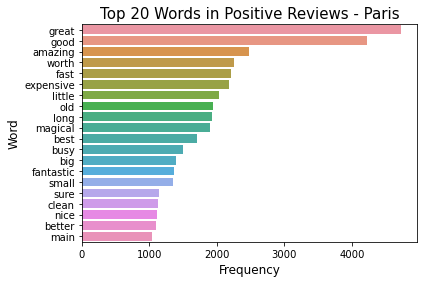

In [32]:
# Visualize top words
sns.barplot(x=list(dict(paris_top_pos_adj).values()), y=list(dict(paris_top_pos_adj).keys()), data=paris_pos_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Positive Reviews - Paris", fontsize=15)
plt.show()

In [30]:
# Filter out the positive reviews
hkong_pos_reviews = hkong[hkong['Rating_Type']=='Positive']

# Extract the adjectives in the positive reviews
hkong_pos_adj = [token.text.lower() for doc in hkong_pos_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the positive reviews
hkong_top_pos_adj = Counter(hkong_pos_adj).most_common(20)
hkong_top_pos_adj

[('great', 2741),
 ('good', 2320),
 ('small', 1589),
 ('worth', 1108),
 ('long', 1088),
 ('best', 1055),
 ('old', 944),
 ('nice', 927),
 ('smaller', 897),
 ('expensive', 844),
 ('big', 817),
 ('little', 807),
 ('amazing', 801),
 ('fun', 764),
 ('easy', 758),
 ('sure', 748),
 ('magical', 675),
 ('young', 652),
 ('hot', 577),
 ('different', 565)]

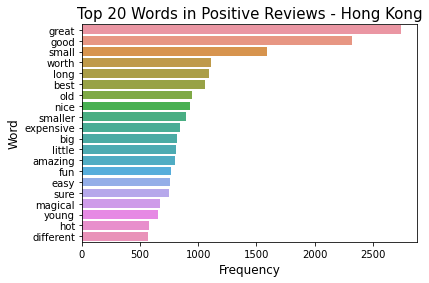

In [39]:
# Visualize top words
sns.barplot(x=list(dict(hkong_top_pos_adj).values()), y=list(dict(hkong_top_pos_adj).keys()), data=hkong_pos_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Positive Reviews - Hong Kong", fontsize=15)
plt.show()

# POS by Negative Rating

In [5]:
# Do the same for the negative reviews
calif_neg_reviews = calif[calif['Rating_Type']=='Negative']

calif_neg_adj = [token.text.lower() for doc in calif_neg_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Top 20 common adjectives in negative reviews
calif_neg_adj = Counter(calif_neg_adj).most_common(20)
calif_neg_adj

[('long', 379),
 ('fast', 376),
 ('good', 284),
 ('old', 262),
 ('crowded', 217),
 ('great', 207),
 ('expensive', 195),
 ('better', 186),
 ('disappointed', 173),
 ('worth', 171),
 ('small', 158),
 ('little', 155),
 ('rude', 146),
 ('able', 135),
 ('bad', 124),
 ('sure', 114),
 ('happiest', 112),
 ('busy', 112),
 ('big', 108),
 ('new', 107)]

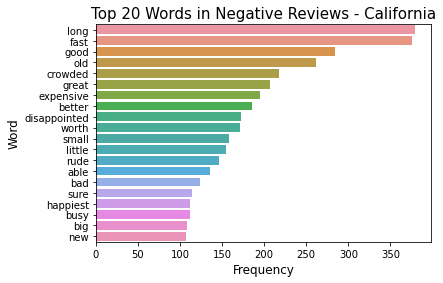

In [27]:
# Visualize top words
sns.barplot(x=list(dict(calif_neg_adj).values()), y=list(dict(calif_neg_adj).keys()), data=calif_neg_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Negative Reviews - California", fontsize=15)
plt.show()

In [15]:
# Do the same for the negative reviews
paris_neg_reviews = paris[paris['Rating_Type']=='Negative']

paris_neg_adj = [token.text.lower() for doc in paris_neg_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Top 20 common adjectives in negative reviews
paris_neg_adj = Counter(paris_neg_adj).most_common(20)
paris_neg_adj

[('good', 652),
 ('fast', 514),
 ('long', 493),
 ('expensive', 467),
 ('old', 451),
 ('great', 359),
 ('better', 359),
 ('small', 347),
 ('poor', 344),
 ('open', 322),
 ('little', 308),
 ('rude', 299),
 ('bad', 272),
 ('disappointed', 271),
 ('big', 256),
 ('main', 238),
 ('worth', 230),
 ('nice', 204),
 ('huge', 203),
 ('young', 197)]

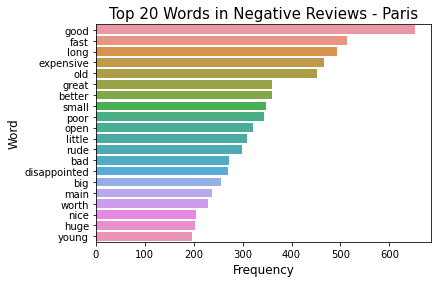

In [28]:
# Visualize top words
sns.barplot(x=list(dict(paris_neg_adj).values()), y=list(dict(paris_neg_adj).keys()), data=paris_neg_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Negative Reviews - Paris", fontsize=15)
plt.show()

In [16]:
# Do the same for the negative reviews
hkong_neg_reviews = hkong[hkong['Rating_Type']=='Negative']

hkong_neg_adj = [token.text.lower() for doc in hkong_neg_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Top 20 common adjectives in negative reviews
hkong_neg_adj = Counter(hkong_neg_adj).most_common(20)
hkong_neg_adj

[('small', 188),
 ('good', 114),
 ('long', 90),
 ('old', 67),
 ('better', 66),
 ('bad', 64),
 ('worth', 61),
 ('expensive', 61),
 ('little', 58),
 ('rude', 54),
 ('great', 51),
 ('hot', 49),
 ('disappointed', 46),
 ('young', 45),
 ('chinese', 43),
 ('worst', 38),
 ('best', 37),
 ('fun', 33),
 ('disappointing', 32),
 ('big', 31)]

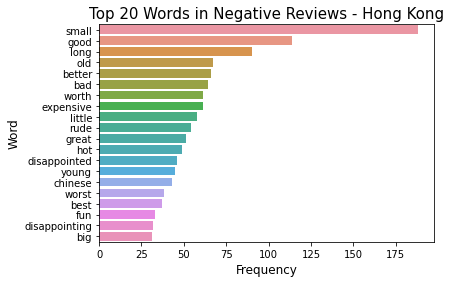

In [29]:
# Visualize top words
sns.barplot(x=list(dict(hkong_neg_adj).values()), y=list(dict(hkong_neg_adj).keys()), data=hkong_neg_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Negative Reviews - Hong Kong", fontsize=15)
plt.show()

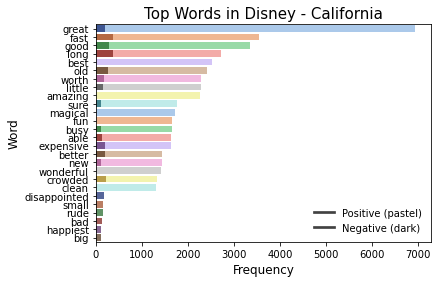

In [38]:
calif_neg = dict(calif_neg_adj)
calif_pos = dict(calif_top_pos_adj)

df_calif = pd.concat([pd.Series(calif_pos, name='Positive'), pd.Series(calif_neg, name='Negative')], axis=1)

# Words in Positive Reviews (pastel colors)
sns.barplot(x=df_calif.Positive.values, y=df_calif.index, palette='pastel', alpha=1, label='High')
# Words in Negative Reviews (dark colors)
sns.barplot(x=df_calif.Negative.values, y=df_calif.index, palette='dark', alpha=0.7, label='Low') #bottom=df_calif.Negative.values)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top Words in Disney - California", fontsize=15)

plt.legend(labels=["Positive (pastel)", "Negative (dark)"], frameon=False, loc="lower right")
plt.show()

Words exclusively in Positive Reviews (California): **"best", "amazing", "wonderful", "clean", "magical", "fun"**

Words exclusively in Negative Reviews (California): **"disappointed", "small", "rude", "bad", "happiest", "big"**

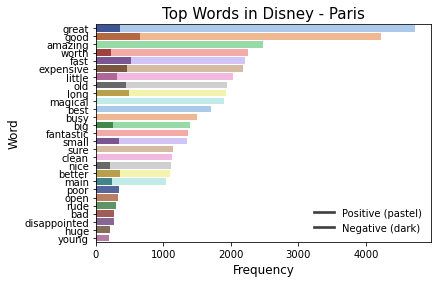

In [39]:
paris_neg = dict(paris_neg_adj)
paris_pos = dict(paris_top_pos_adj)

df_paris= pd.concat([pd.Series(paris_pos, name='Positive'), pd.Series(paris_neg, name='Negative')], axis=1)

# Words in Positive Reviews (pastel colors)
sns.barplot(x=df_paris.Positive.values, y=df_paris.index, palette='pastel', alpha=1, label='High')
# Words in Negative Reviews (dark colors)
sns.barplot(x=df_paris.Negative.values, y=df_paris.index, palette='dark', alpha=0.7, label='Low')#, bottom=df_AB.Negative.values)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top Words in Disney - Paris", fontsize=15)

plt.legend(labels=["Positive (pastel)", "Negative (dark)"], frameon=False, loc="lower right")
plt.show()

Words exclusively in Positive Reviews (Paris): **"amazing", "busy", "clean", "magical", "fun"**

Words exclusively in Negative Reviews (Paris): **"poor", "open", "rude", "bad", "disappointed", "huge"**

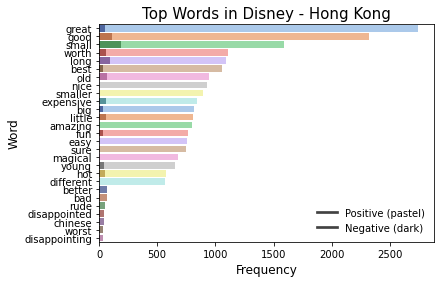

In [41]:
hkong_neg = dict(hkong_neg_adj)
hkong_pos = dict(hkong_top_pos_adj)

df_hkong= pd.concat([pd.Series(hkong_pos, name='Positive'), pd.Series(hkong_neg, name='Negative')], axis=1)

# Words in Positive Reviews (pastel colors)
sns.barplot(x=df_hkong.Positive.values, y=df_hkong.index, palette='pastel', alpha=1, label='High')
# Words in Negative Reviews (dark colors)
sns.barplot(x=df_hkong.Negative.values, y=df_hkong.index, palette='dark', alpha=0.6, label='Low')#, bottom=df_AB.Negative.values)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top Words in Disney - Hong Kong", fontsize=15)

plt.legend(labels=["Positive (pastel)", "Negative (dark)"], frameon=False, loc="lower right")
plt.show()

Words exclusively in Positive Reviews (Hong Kong): **"nice", "smaller", "amazing", "easy", "magical", "different"**

Words exclusively in Negative Reviews (Hong Kong): **"bad", "chinese", "rude", "worst", "disappointed", "disappointing"**

# Scattertext

In [19]:
calif2 = calif.copy()
calif2['docs_list_clean'] = calif_docs_list_clean
calif2.head(2)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score,spacy_doc,docs_clean,docs_list_clean
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,California,Positive,0.9008,"(This, place, has, always, been, and, forever,...","[place, forever, special, feeling, enter, park...",place forever special feeling enter park see c...
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,California,Positive,0.9595,"(A, great, day, of, simple, fun, and, thrills,...","[great, day, simple, fun, thrill, bring, cash,...",great day simple fun thrill bring cash cheap k...


In [21]:
# nlp = spacy.load('en_core_web_sm')

# Scattertext of Disney - California
corpus = st.CorpusFromPandas(
            calif2,
            category_col = 'Rating_Type',
            text_col = 'docs_list_clean',
            nlp = st.whitespace_nlp_with_sentences).build()

In [26]:
html = st.produce_scattertext_explorer(
        corpus,
        category='Positive',
        category_name='Positive',
        not_category_name='Negative',
        minimum_term_frequency=20,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000)

open('calif_reviews_html.html', 'wb').write(html.encode('utf-8'))

6754048

Note: calif_reviews_html file saved in local folder.  Click to open in browser.

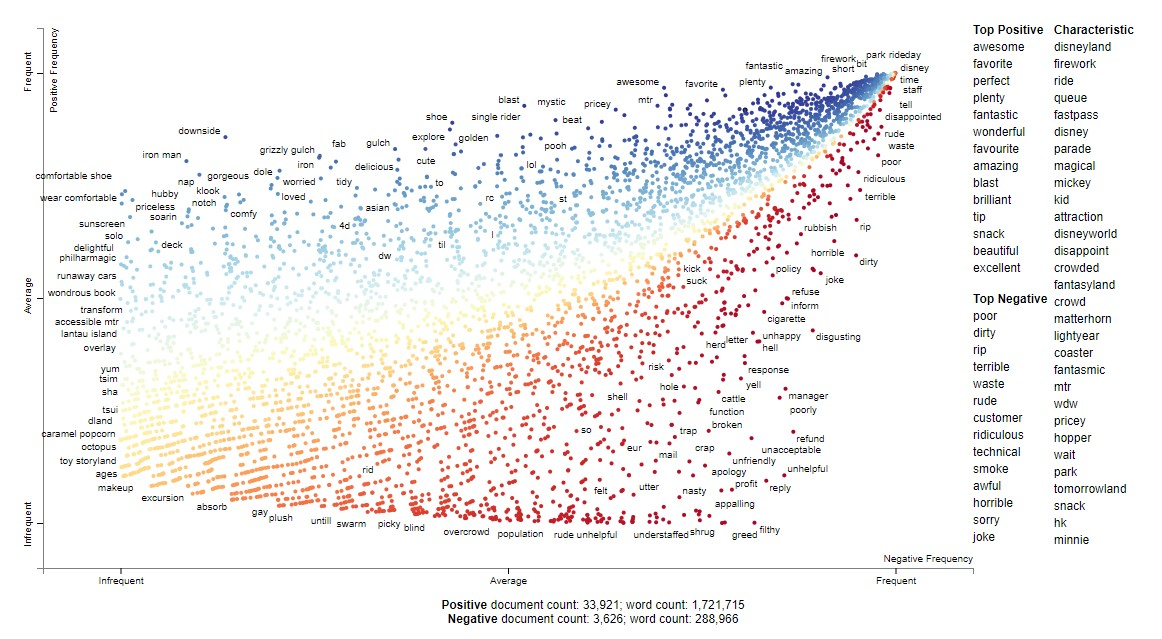

# Topic Modeling - LSA with TfidfVectorizer

In [22]:
# Merge all tokens together and build Vectorizer with cleaned text data
calif_docs_list_clean = [' '.join(doc) for doc in calif.docs_clean]
paris_docs_list_clean = [' '.join(doc) for doc in paris.docs_clean]
hkong_docs_list_clean = [' '.join(doc) for doc in hkong.docs_clean]

In [19]:
# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### Vectorize, Fit the Model

In [18]:
# Disney - California
# Convert documents to document-term matrix using TfidfVectorizer, remove English stop words
tfv = TfidfVectorizer(stop_words='english')
X = tfv.fit_transform(calif_docs_list_clean)

df_X = pd.DataFrame(X.toarray(), columns=tfv.get_feature_names_out())

# Fit the model
num_topics=4

calif_lsa_topics = TruncatedSVD(num_topics)
calif_lsa_doc_topic = calif_lsa_topics.fit(X)

In [28]:
# Disney - Paris
# Convert documents to document-term matrix using TdifVectorizer, remove English stop words
tfv = TfidfVectorizer(stop_words='english')
X2 = tfv.fit_transform(paris_docs_list_clean)

df_X2 = pd.DataFrame(X2.toarray(), columns=tfv.get_feature_names_out())

# Fit the model
paris_lsa_topics = TruncatedSVD(num_topics)
paris_lsa_doc_topic = paris_lsa_topics.fit(X2)

In [32]:
# Disney - HongKong
# Convert documents to document-term matrix using TdifVectorizer, remove English stop words
tfv = TfidfVectorizer(stop_words='english')
X3 = tfv.fit_transform(hkong_docs_list_clean)

df_X3 = pd.DataFrame(X3.toarray(), columns=tfv.get_feature_names_out())

# Fit the model
hkong_lsa_topics = TruncatedSVD(num_topics)
hkong_lsa_doc_topic = hkong_lsa_topics.fit(X3)

### Display Topics

In [23]:
# Disney - California
display_topics(calif_lsa_topics, tfv.get_feature_names_out(), 10)


Topic  0
ride, park, time, day, disneyland, disney, great, line, pass, love

Topic  1
place, love, disneyland, happy, earth, disney, year, visit, kid, family

Topic  2
disney, park, world, florida, small, california, adventure, visit, original, walt

Topic  3
day, place, park, earth, happy, pass, hopper, ticket, spend, california


In [30]:
# Disney- Paris
display_topics(paris_lsa_topics, tfv.get_feature_names_out(), 10)


Topic  0
ride, park, day, disneyland, disney, time, visit, kid, good, great

Topic  1
place, kid, enjoy, visit, family, parade, adult, love, firework, fun

Topic  2
kong, hong, disneyland, visit, disney, small, world, compare, paris, place

Topic  3
disney, park, small, great, kid, fun, love, place, child, world


In [33]:
# Disney - Hong Kong
display_topics(hkong_lsa_topics, tfv.get_feature_names_out(), 10)


Topic  0
ride, park, day, disneyland, disney, time, visit, kid, good, great

Topic  1
place, kid, enjoy, visit, family, parade, adult, love, happy, firework

Topic  2
kong, hong, disneyland, visit, disney, small, world, compare, place, paris

Topic  3
disney, park, kid, great, small, place, fun, love, like, world


# Topic Modeling with CorEx 
### Unsupervised, No Anchor Words

In [39]:
# Vectorize the document
vectorizer = CountVectorizer(max_features=2500,
                             stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

In [41]:
calif_word = vectorizer.fit_transform(calif_docs_list_clean)
calif_words = list(np.asarray(vectorizer.get_feature_names_out()))

paris_word = vectorizer.fit_transform(paris_docs_list_clean)
paris_words = list(np.asarray(vectorizer.get_feature_names_out()))

hkong_word = vectorizer.fit_transform(hkong_docs_list_clean)
hkong_words = list(np.asarray(vectorizer.get_feature_names_out()))

In [50]:
# Disney - California
calif_topic_model = ct.Corex(n_hidden= 5,
                       words=calif_words, 
                       seed=1)

calif_topic_model.fit(calif_word,         
                words= calif_words,     
                docs= calif.docs_clean)

# Topics without anchored words
calif_topics = calif_topic_model.get_topics()
for n,topic in enumerate(calif_topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: people, disney, like, disneyland, way, think, know, tell, thing, try
1: day, park, pass, fast, ticket, early, california, adventure, hotel, use
2: main, parade, street, firework, walk, character, night, mickey, area, sit
3: wait, ride, line, hour, time, long, minute, want, crowd, open
4: mountain, space, jones, indiana, haunted, mansion, thunder, splash, caribbean, star


In [49]:
# Disney - Paris
paris_topic_model = ct.Corex(n_hidden= 5,
                       words=paris_words, 
                       seed=1)

paris_topic_model.fit(paris_word,         
                words= paris_words,     
                docs= paris.docs_clean)

# Topics without anchored words
paris_topics = paris_topic_model.get_topics()
for n,topic in enumerate(paris_topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: hotel, food, stay, queue, eat, day, meal, hour, book, time
1: people, staff, leave, tell, say, way, pay, ask, service, need
2: disney, park, paris, disneyland, like, think, small, minute, look, train
3: character, parade, meet, mickey, castle, princess, little, old, year, night
4: mountain, thunder, space, jones, indiana, peter, buzz, pan, caribbean, coaster


In [51]:
# Disney - Hong Kong
hkong_topic_model = ct.Corex(n_hidden= 5,
                       words=hkong_words, 
                       seed=1)

hkong_topic_model.fit(hkong_word,         
                words= hkong_words,     
                docs= hkong.docs_clean)

# Topics without anchored words
hkong_topics = hkong_topic_model.get_topics()
for n,topic in enumerate(hkong_topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: food, main, street, english, chinese, restaurant, lunch, people, way, good
1: mountain, grizzly, mystic, space, manor, gulch, toy, story, lion, king
2: ticket, wait, buy, long, time, line, minute, day, queue, pass
3: mickey, parade, firework, character, night, water, pm, bring, photo, watch
4: park, disney, hong, kong, small, world, disneyland, think, like, year
